In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import datetime

In [18]:
# obtain the exchage rate data from AKShare, which is an elegant and simple financial data interface library for Python
# using the API below, to access history trading data from the following website
# http://biz.finance.sina.com.cn/forex/forex.php?startdate=2012-01-01&enddate=2021-06-14&money_code=EUR&type=0
exchange_rate_orign_df = ak.currency_boc_sina(symbol="加拿大元", start_date="20190101", end_date="20231031")

In [19]:
# Select data which I interested in and rename the columns of dataframe
exchange_rates = exchange_rate_orign_df[['日期','中行钞卖价/汇卖价', '中行汇买价']].rename(
        columns={
            "日期": "date", # type: datetime.dat
            "中行钞卖价/汇卖价": "bank_selling_exchange_rate", # The amount of Chinese currency that Bank of China willing to sell 100 CAD$ to you
            '中行汇买价':"bank_buying_exchange_rate" # The amount of Chinese currency that Bank of China is willing to buy 100 CAD$ from you
            }
        )

exchange_rates.set_index(exchange_rates['date'], inplace=True)

In [20]:
selling_rates = exchange_rates['bank_buying_exchange_rate']
selling_rates.index = pd.to_datetime(selling_rates.index)

In [42]:
mpl.rcParams.update({
    'figure.figsize': [15, 8]
})

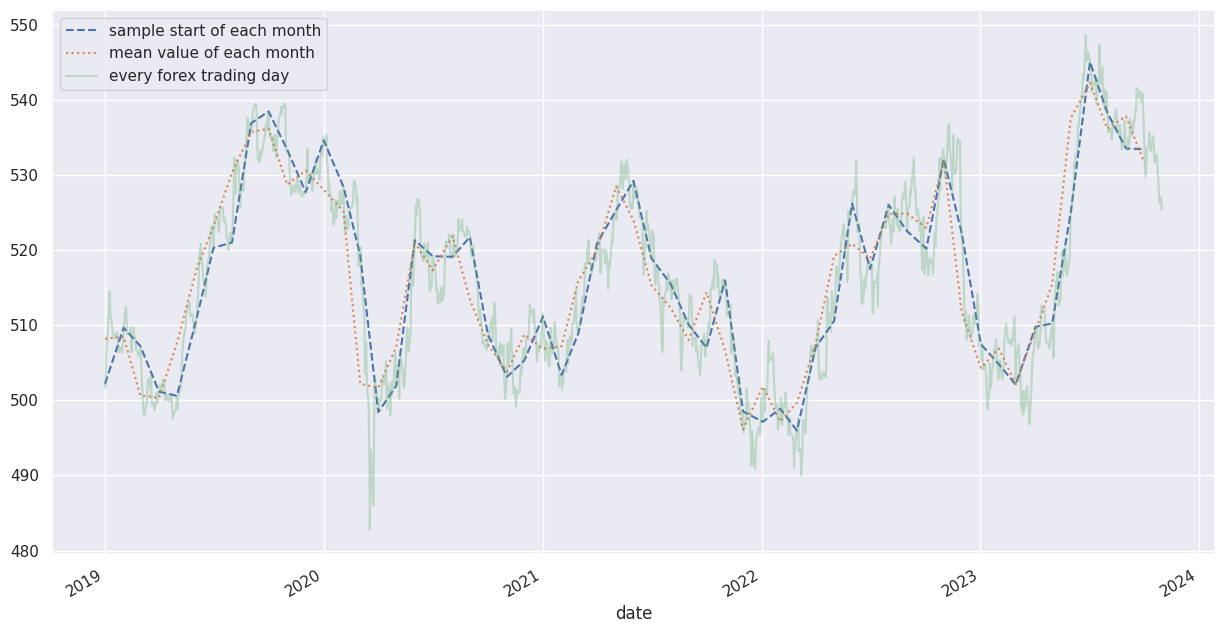

In [29]:
selling_rates.asfreq('BMS').plot(style='--', label='sample start of each month')
selling_rates.resample('BMS').mean().plot(style=':', label='mean value of each month')
selling_rates.plot(alpha=0.3, style='-', label = 'every forex trading day')
plt.legend()

In [45]:
selling_rates.resample('BA').min()

date
2019-12-31    497.58
2020-12-31    482.84
2021-12-31    490.92
2022-12-30    489.99
2023-12-29    496.77
Freq: BA-DEC, Name: bank_buying_exchange_rate, dtype: float64

In [46]:
selling_rates.resample('BA').max()

date
2019-12-31    539.49
2020-12-31    535.27
2021-12-31    532.06
2022-12-30    536.74
2023-12-29    548.68
Freq: BA-DEC, Name: bank_buying_exchange_rate, dtype: float64

In [47]:
selling_rates.resample('BA').mean()

date
2019-12-31    519.089692
2020-12-31    513.139389
2021-12-31    512.882222
2022-12-30    515.258378
2023-12-29    522.383594
Freq: BA-DEC, Name: bank_buying_exchange_rate, dtype: float64

In [75]:
selling_rates.resample('BA').median()

date
2019-12-31    521.39
2020-12-31    512.40
2021-12-31    513.45
2022-12-30    516.87
2023-12-29    525.05
Freq: BA-DEC, Name: bank_buying_exchange_rate, dtype: float64

### Plot the mean and median value of each year, and find mean exchange rates are more stable than median, so we can stay focus on mean value rather than median value when study the trend of the time series.

### potential explanations for why mean values might appear more stable than median values in the exchange rates time series data:
Few Outliers:(Not the case)

    If there are only a few outliers in the time series, their impact on the mean might be limited. The mean is particularly sensitive to extreme values when those extreme values significantly differ from the majority of the data.(If the extreme values are not substantially different from the majority of the data, the mean may be less affected.)

Outlier Distribution:

    If the extreme values in the time series are distributed symmetrically around the mean, the mean might not be as strongly affected. In contrast, if outliers are more skewed in one direction, the mean can be significantly influenced.

Temporal Patterns:

    The stability of mean and median values can also depend on the temporal patterns within time series. If there are consistent patterns or trends that affect the overall distribution, the mean might be more stable.

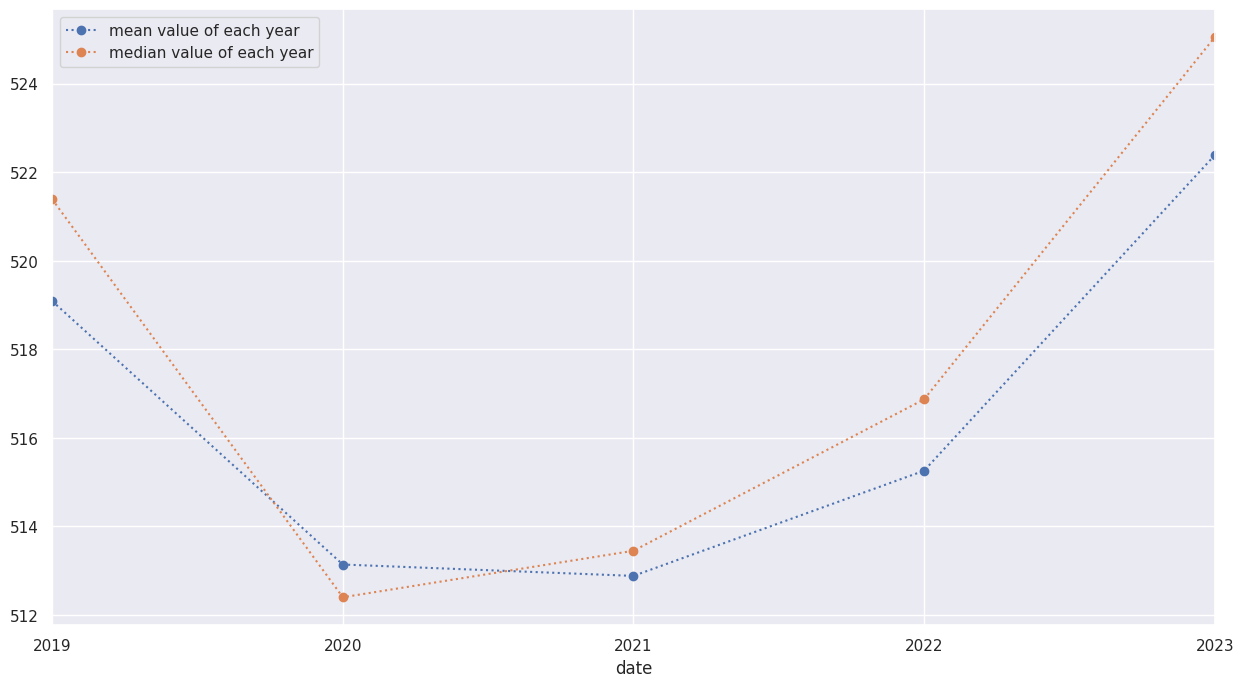

In [117]:
selling_rates.resample('BA').mean().plot(style=':', label='mean value of each year', marker='o')
selling_rates.resample('BA').median().plot(style=':', label='median value of each year', marker='o')

plt.legend()

<Axes: xlabel='date'>

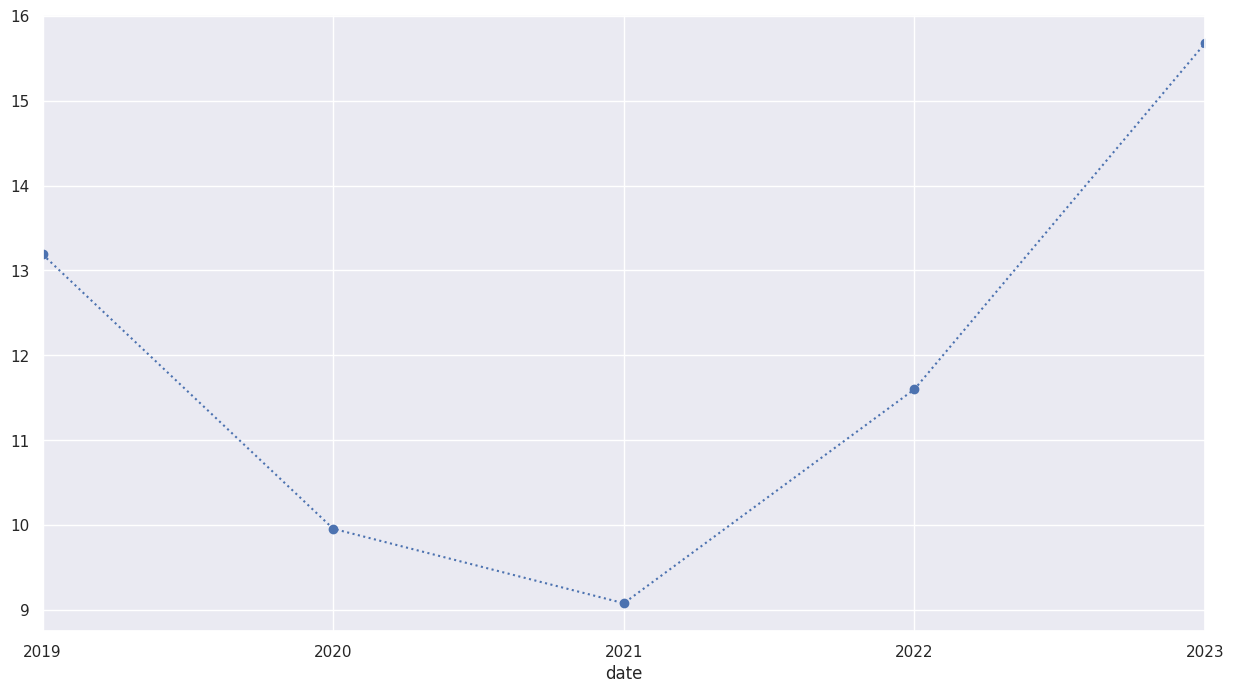

In [126]:
selling_rates.resample('BA').std().plot(style=':', label='standard deviation of each year', marker='o')

In [125]:
selling_rates.resample('BA').std()/selling_rates.resample('BA').mean()

date
2019-12-31    0.025408
2020-12-31    0.019406
2021-12-31    0.017704
2022-12-30    0.022514
2023-12-29    0.030009
Freq: BA-DEC, Name: bank_buying_exchange_rate, dtype: float64

### Low Coefficient of Variation (CV):

    In the follwing graph: The CV is less than 3.0%, which is considered low.
    A low CV indicates that the standard deviation is small relative to the mean.
    The data points are tightly clustered around the mean.
    There is relatively low variability or dispersion in the dataset.

<Axes: xlabel='date'>

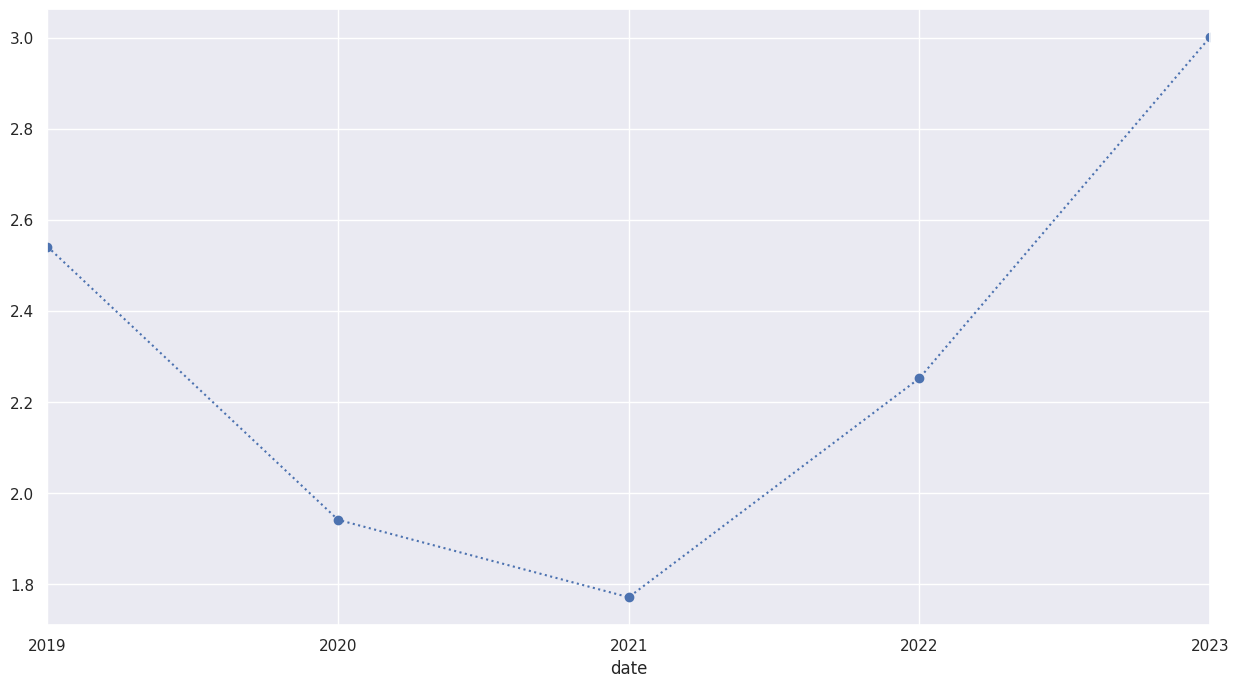

In [134]:
(selling_rates.resample('BA').std()/selling_rates.resample('BA').mean()*100).plot(style=':', label='standard deviation of each year', marker='o')

In [150]:
selling_rates

date
2019-01-01    502.21
2019-01-02    501.65
2019-01-03    506.46
2019-01-04    507.35
2019-01-07    511.23
               ...  
2023-10-25    529.84
2023-10-26    527.55
2023-10-27    526.23
2023-10-30    527.00
2023-10-31    525.39
Name: bank_buying_exchange_rate, Length: 1259, dtype: float64

### Histogram Visual Inspection

### Shape of the Distribution:

    Symmetry: A symmetric distribution has a similar shape on both sides of the center.
    Skewness: Skewness indicates the asymmetry of the distribution. Positive skewness means the right tail is longer, and negative skewness means the left tail is longer.

### Central Tendency:

    Mean vs. Median: If the histogram is symmetric, the mean and median are approximately equal. If it's skewed, they might differ, and the mean is pulled in the direction of the longer tail.

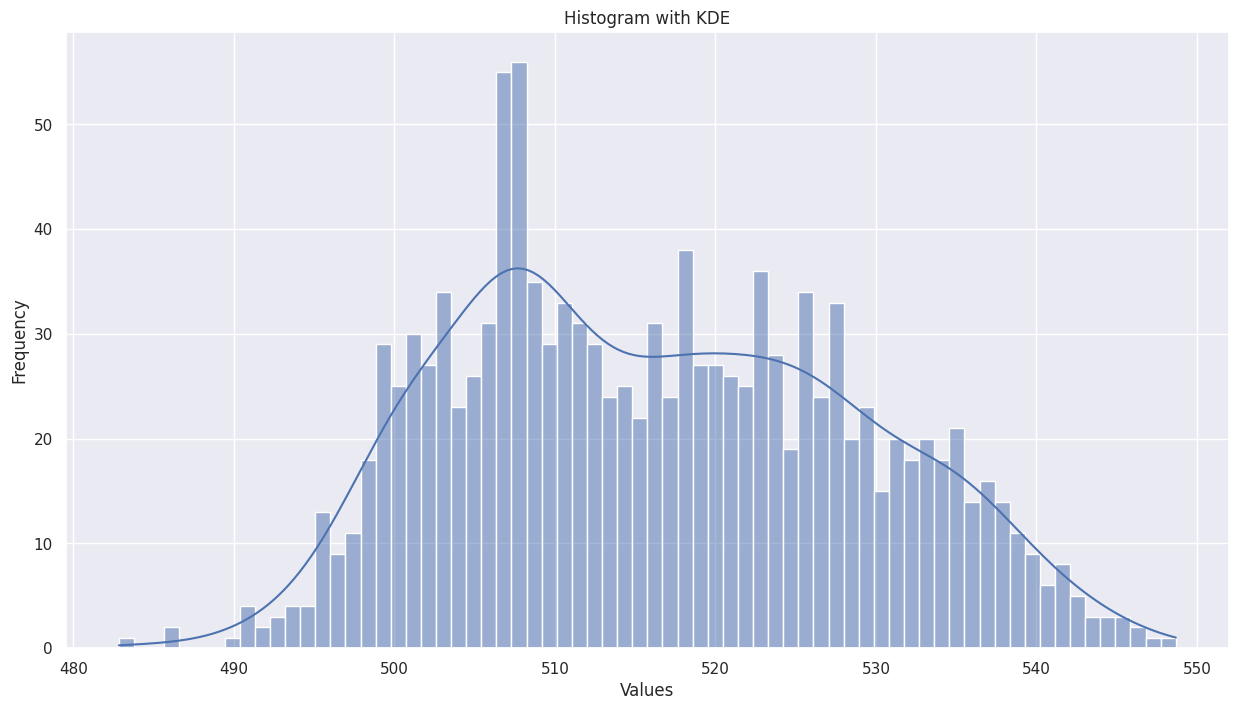

In [169]:
# Display a histogram for a more detailed view of the data distribution
seaborn.histplot(selling_rates, bins=70, kde=True)
plt.title('Histogram with KDE')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

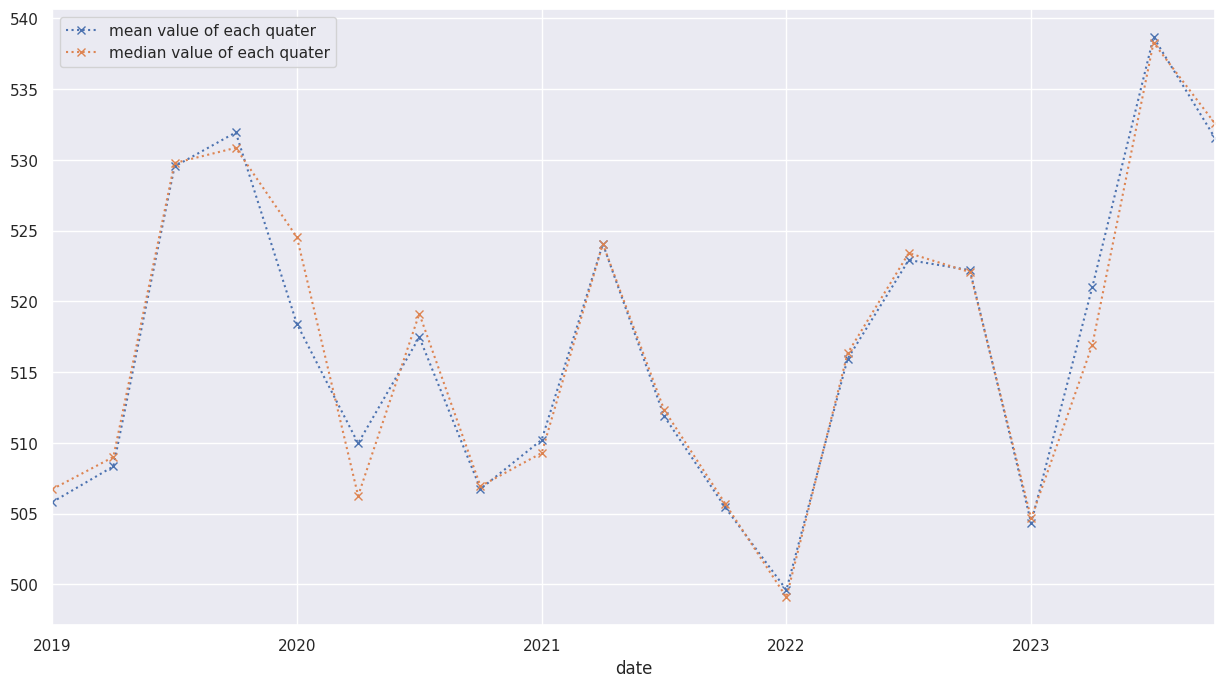

In [107]:
selling_rates.resample('BQ').mean().plot(style=':', label='mean value of each quater', marker='x')
selling_rates.resample('BQ').median().plot(style=':', label='median value of each quater', marker='x')

plt.legend()

<Axes: xlabel='date'>

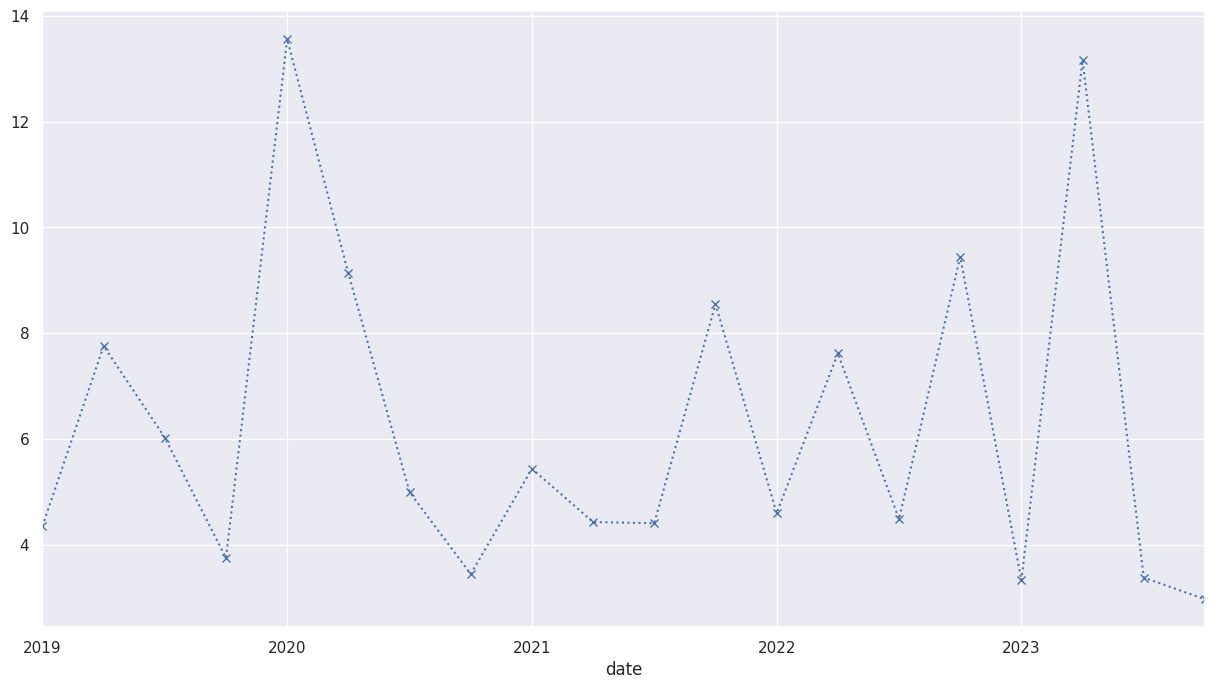

In [140]:
selling_rates.resample('BQ').std().plot(style=':', label='standard deviation of each quater', marker='x')

<Axes: xlabel='date'>

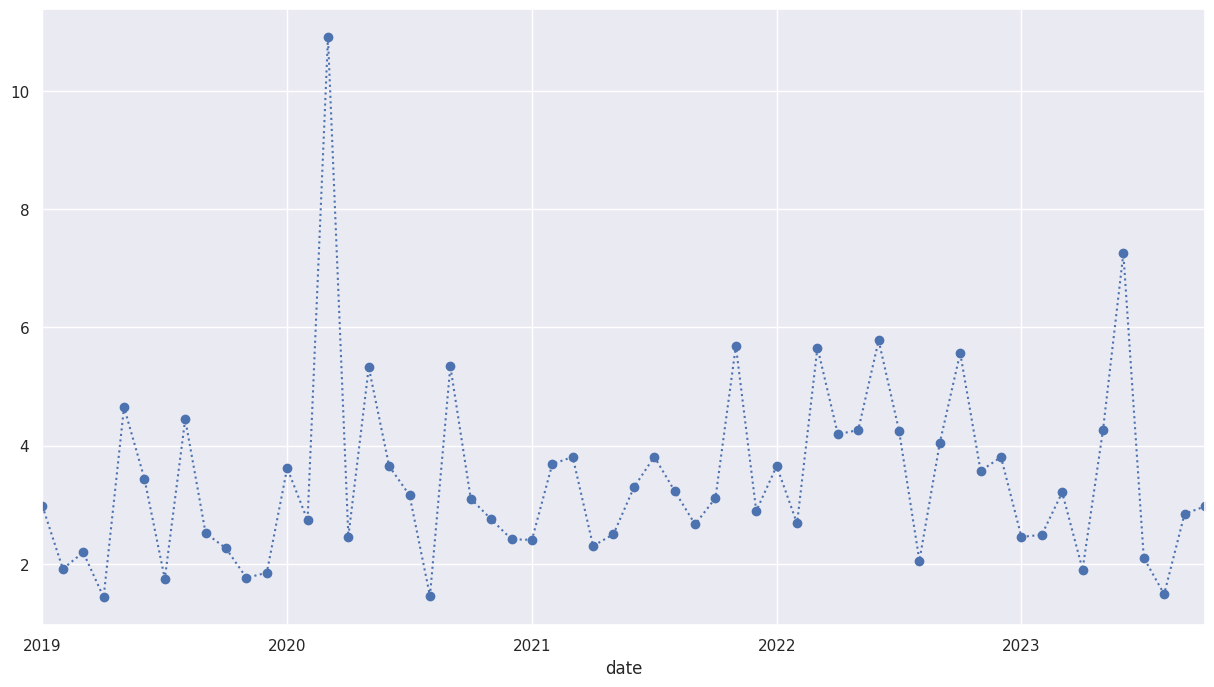

In [123]:
selling_rates.resample('M').std().plot(style=':', label='median value of each year', marker='o')

<Axes: xlabel='date'>

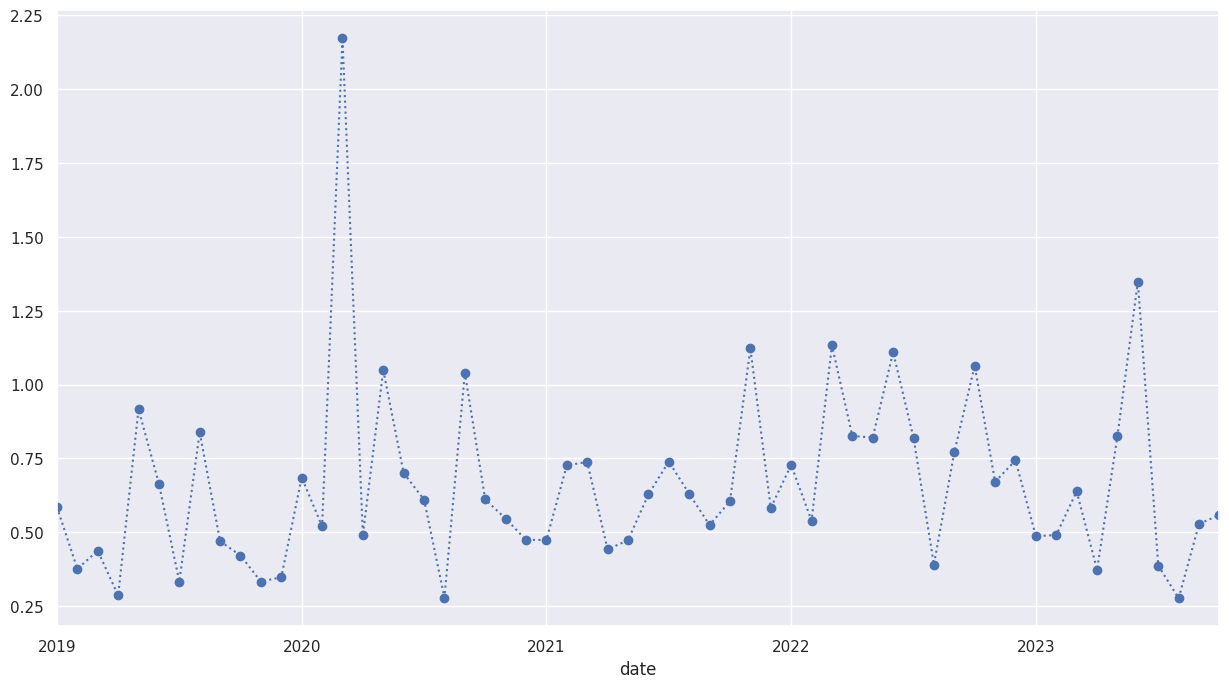

In [136]:
(selling_rates.resample('M').std()/selling_rates.resample('M').mean()*100).plot(style=':', label='median value of each year', marker='o')

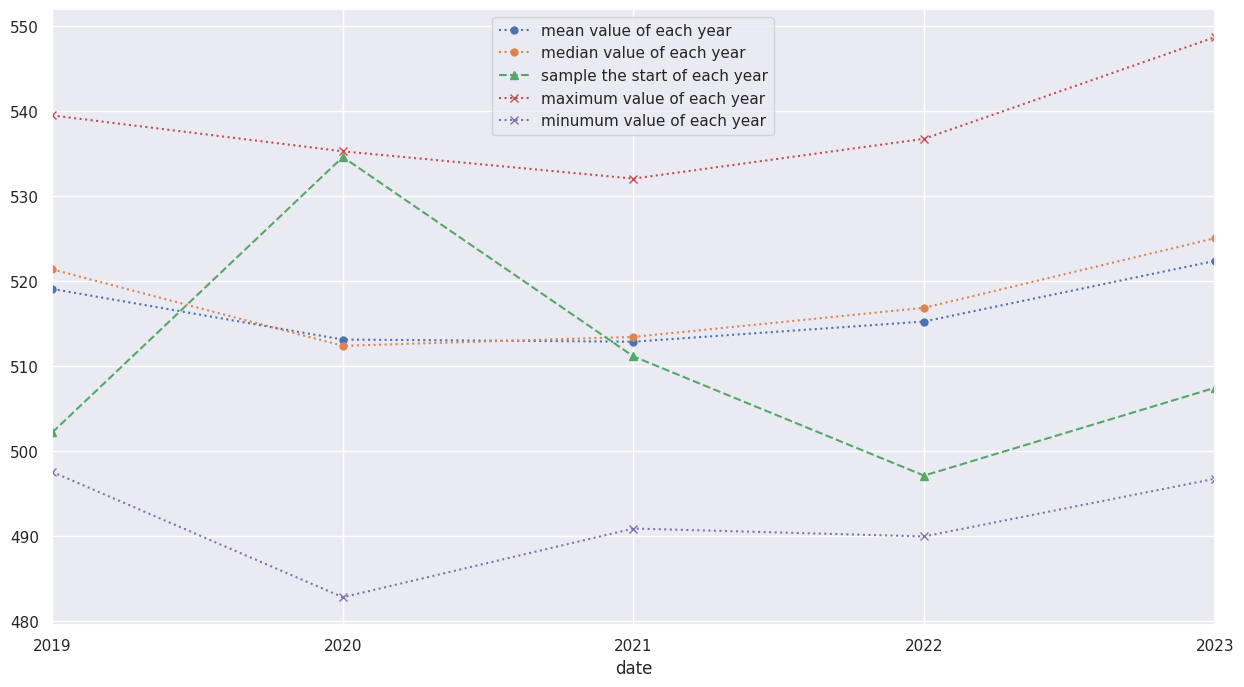

In [114]:
selling_rates.resample('BA').mean().plot(style=':', label='mean value of each year', marker='o', markersize=5)
selling_rates.resample('BA').median().plot(style=':', label='median value of each year', marker='o', markersize=5)
selling_rates.asfreq('BAS').plot(style='--', label='sample the start of each year', marker='^')
selling_rates.resample('BA').max().plot(style=':', label='maximum value of each year', marker='x')
selling_rates.resample('BA').min().plot(style=':', label='minumum value of each year', marker='x')
plt.legend()

### But tell from the following graph, extreme values are substantial and deviate significantly from the central tendency of the dataset, the mean should have been more sensitive, and its stability should have been compromised.

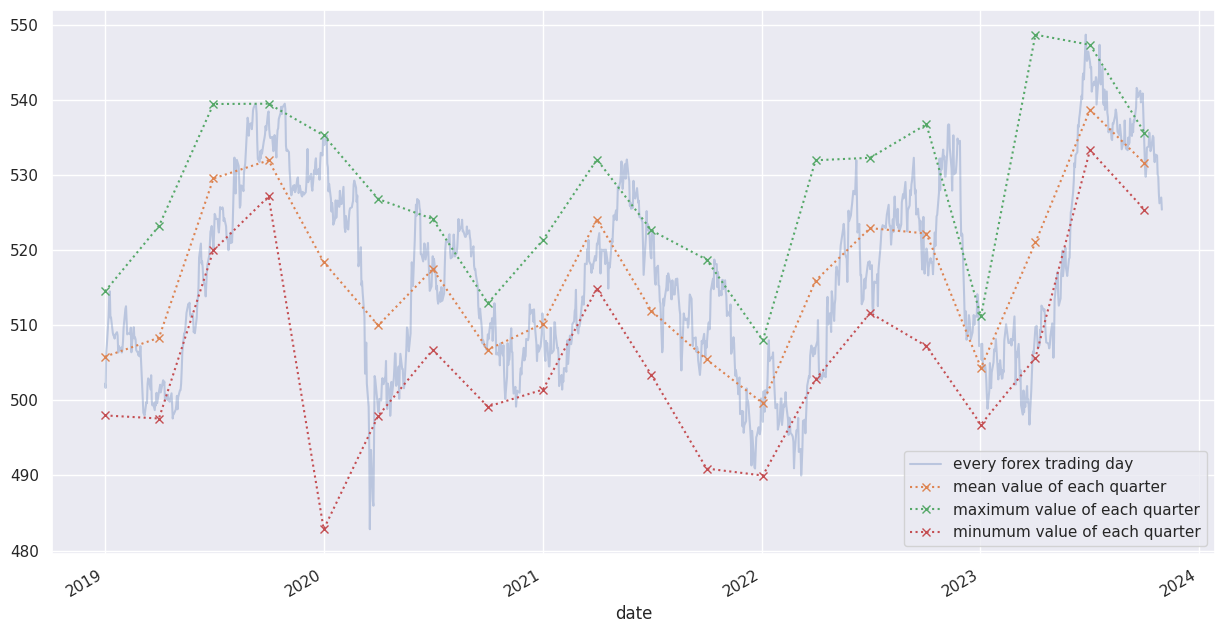

In [74]:
selling_rates.plot(alpha=0.3, style='-', label = 'every forex trading day')
selling_rates.resample('BQS').mean().plot(style=':', label='mean value of each quarter', marker="x")
# selling_rates.asfreq('BQS').plot(style='--', label='sample the start of each quarter')
selling_rates.resample('BQS').max().plot(style=':', label='maximum value of each quarter', marker="x")
selling_rates.resample('BQS').min().plot(style=':', label='minumum value of each quarter', marker="x")

plt.legend()

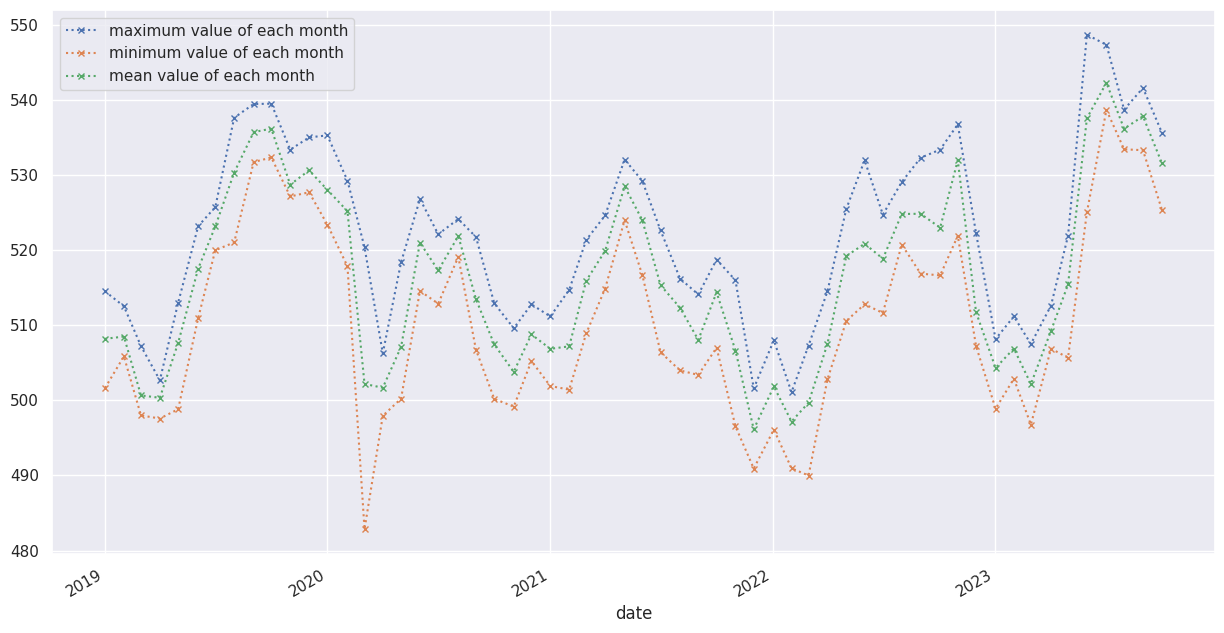

In [91]:
selling_rates.resample('BMS').max().plot(style=':', label='maximum value of each month', marker='x', markersize=5)
selling_rates.resample('BMS').min().plot(style=':', label='minimum value of each month', marker='x', markersize=5)
selling_rates.resample('BMS').mean().plot(style=':', label='mean value of each month', marker='x', markersize=5)
# selling_rates.plot(alpha=0.3, style='-', label = 'every forex trading day')
plt.legend()